# Importing libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [36]:
data=pd.read_csv("/home/mahyar/Desktop/Data/hospital costs/insurance.csv")

# Information of dataset

In [37]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [39]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [40]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [42]:
data["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [43]:
data["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [44]:
data["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [72]:
frame = []
for x in data["region"] :
    if x=="southeast":
        frame.append(1)
    elif x=="southwest":
        frame.append(2)
    elif x=="northwest":
        frame.append(3)
    else:
        frame.append(4)

In [74]:
data["region"]=frame

In [45]:
data["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

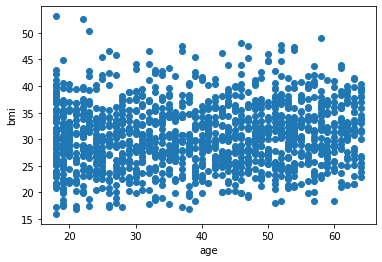

In [64]:
plt.scatter(data["age"],data["bmi"])
plt.xlabel("age")
plt.ylabel("bmi")
plt.show()

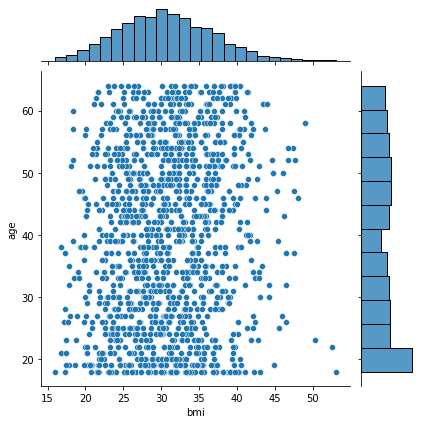

In [65]:
sns.jointplot(data=data,x="bmi",y="age")

<AxesSubplot:xlabel='age', ylabel='Count'>

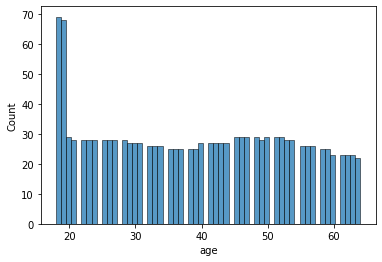

In [70]:
sns.histplot(data["age"],bins=60)

<AxesSubplot:xlabel='age', ylabel='charges'>

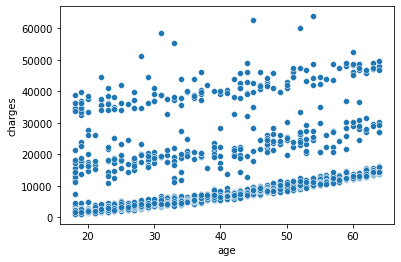

In [77]:
sns.scatterplot(data=data,x="age",y="charges")

<AxesSubplot:>

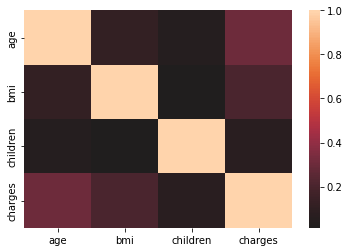

In [76]:
sns.heatmap(data.drop(["region"],axis=1).corr(),center=0)

In [79]:
frame=[]

frame=pd.get_dummies(data["sex"],drop_first=True)

In [80]:
frame

,male
0,0
1,1
2,1
3,1
4,1
...,...
1333,1
1334,0
1335,0
1336,0


In [81]:
data["sex"]=frame

In [85]:
data=data.rename({"sex":"male"},axis=1)

In [87]:
frame=[]

frame=pd.get_dummies(data["smoker"],drop_first=True)

In [88]:
frame

,yes
0,1
1,0
2,0
3,0
4,0
...,...
1333,0
1334,0
1335,0
1336,0


In [89]:
data["smoker"]=frame

In [90]:
data.head()

,age,male,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,2,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


In [94]:
x=data.drop(["charges"],axis=1)
y=data["charges"]
xtrian,xtest,ytrain,ytest=train_test_split(x,y)

In [92]:
lr=LinearRegression()

In [96]:
prediction=lr.fit(xtrian,ytrain).predict(xtest)

In [99]:
len(ytest)

335

<AxesSubplot:ylabel='charges'>

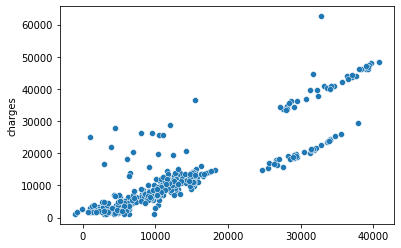

In [103]:
sns.scatterplot(x=prediction,y=ytest)


In [112]:
metrics.mean_absolute_percentage_error(prediction,ytest)

0.5754182713815003

In [109]:
pd.DataFrame(lr.coef_,index=['age', 'male', 'bmi', 'children', 'smoker', 'region'])

,0
age,254.539065
male,-80.366174
bmi,349.206469
children,373.806230
smoker,24008.180620
region,462.205900
